In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

##  1. The Mandelbrot set

In this exercise, we look at the Mandelbrot set -- a famous fractal.

(You can add additional computational cells using the "+" button above)

The set is defined as the set of complex numbers c which for which repeated application of the map
$$z_{n+1} = z_n^2 + c $$
with $z_0=0$ does not produce a divergent sequence.

A typical sequence starts $0,\, c,\, c^2+c,\dots$

e.g. $c = 1$ gives 0, 1, 2, 5, .... which tends to infinity, so 1 IS NOT a member of the set.

$c=-1$ returns 0, -1, 0, -1, .... which is bounded, and so -1 IS a member of the set.

To visualise the Mandelbrot set, we normally calculate how many iterations $n$ it takes for $|z_n|$ to cross a certain, arbitrary threshold, usually $|z_n| \ge 2$.
We assume a point belongs to the set if we reach a high number of iterations without reaching the threshold.

The following cells show a simple implementation which defines a function to return $n$ for a single value of $c$, and then loop over the points in a grid to create a plot


In [2]:
# Simple implementation

#returns the value of the last 'n' for which |z_n| < 2, or maxruns if this does not occur
def func(c, maxruns):
    z = c            #first run
    for i in range(maxruns):
        if(abs(z)> 2):
            return i
        z = z**2 + c
    return maxruns

In [3]:
# calculate n over a grid of points z = x + yi
xmin, xmax = -2.0, 0.5
ymin, ymax = -1.25, 1.25
dimpts = 100
maxruns = 80

x=np.linspace(xmin, xmax, dimpts)
y=np.linspace(ymin, ymax, dimpts)

X,Y = np.meshgrid(x, y)
M = [func(xa+ya*1j, maxruns) for ya in y for xa in x]
M = np.array(M).reshape(X.shape)

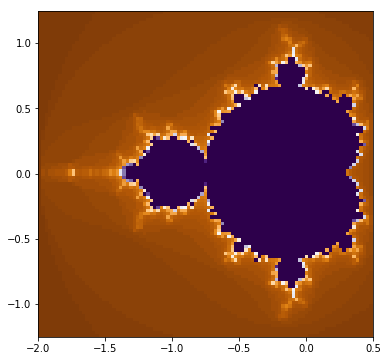

In [4]:
fig,ax =plt.subplots(figsize=(6,6))
ax.pcolormesh(X, Y, M, cmap=cm.PuOr, vmax=1.0*M.max())
plt.show()

## Vectorisation

In the above example, we used two nested for loops to perform the calculation at every grid point

        M = [func(xa+ya*1j, maxruns) for ya in y for xa in x]
        
This is far from optimal -- ideally we want to take advantage of array methods within numpy to perform this calculation more efficiently.

This is easy when we want to perform, e.g. multiplication, due to straightforward elementwise operations.

It is more tricky in situations like this, when we want to find the the number of steps required for a particular condition to be true.

To do so, we need to construct a new function, and can use numpy functions np.less or np.greater.

Let's first look at how these functions work:

In [5]:
temparray = np.linspace(0.0, 10.0, 11)
print(temparray)
lesscheck = np.less(temparray, 4.0)
print(lesscheck)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
[ True  True  True  True False False False False False False False]


This returns a Boolean array corresponding to evaluating "is less than" for each element in the initial array.

This array can also be used to assign values

In [6]:
temparray2=np.zeros_like(temparray)
temparray2[lesscheck] = 3.0
print(temparray2)

[ 3.  3.  3.  3.  0.  0.  0.  0.  0.  0.  0.]


In this case, the value is only assigned if the corresponding element of lesscheck is 'True'

<br>

## Exercise 1:
Write a vectorised version of func to calculate $n$ for all grid points together.

Basic function layout:

    def func_vec(X, Y, maxruns):
        M = np.zeros_like(X)                       # output array 
        z = np.zeros_like(X, dtype=complex)        # values of z at each stage, here z0=0 for all initial points
        
        ##loop -- for each iteration:
            ## find which indices correspond to z points still inside the threshold at this stage
            ## write the loop index to the corresponding elements of M
            ## update z (only need to do this for points still inside the threshold)
        #return the output vector
        
Note there are several ways of writing this algorithm - this version updates the M vector for each point where |z| is LESS than the threshold at each step.

This way, its last update (and outputted value) corresponds to the required value of $n$



In [7]:
#vectorised version of the function
def func_vec(X, Y, maxruns):
    M = np.zeros_like(X)                       
    z = np.zeros_like(X, np.complex)
    
    ##loop over iterations goes here!
    for i in range(maxruns +1):
        tempvec = np.less(abs(z), 2.0)
        M[tempvec] = i - 1
        z[tempvec] = z[tempvec] * z[tempvec] + X[tempvec] + Y[tempvec] * 1j
    
    
    return M

Now check your new function by reproducing the figure above.

Use %timeit to compare the speed of the func and func_vec routines for the lattice

Create a higher definition version

In [16]:
dimpts2=1000
maxruns2=80
xn=np.linspace(xmin, xmax, dimpts2)
yn=np.linspace(ymin, ymax, dimpts2)

Xn,Yn = np.meshgrid(xn, yn)
Ma = func_vec(Xn, Yn, maxruns2)

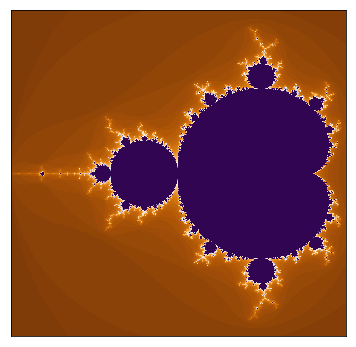

In [17]:
from matplotlib import colors
fig,ax =plt.subplots(figsize=(6,6))
ax.pcolormesh(Xn, Yn, Ma, cmap=cm.PuOr, vmax=1.0*M.max())

ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [14]:
%timeit [func(xa+ya*1j, maxruns) for ya in y for xa in x] ##looping version


264 ms ± 30.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit func_vec(Xn, Yn, maxruns2) ##vectorised version


14.9 ms ± 702 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


The new func_vec algorithm allows you to produce much higher definition plots, and run for larger numbers of iterations, which are sometimes required when calculating different sections of the set.

## Homework Q1:
Use the new function to create plots of the following 4 regions of the Mandlebrot set. 

In each case use an appropriate number of iterations and grid points, and colour map, to produce a clear plot.

Produce a 2x2 subplot grid to present the results.


i) $-0.625 < x < -0.425 $  ;   $ -0.7 < y < -0.5$

ii) $-0.575 < x < -0.550 $  ;   $ -0.650 < y < -0.625$

iii) A circular shape, centered at (-1.0, 0.0) and with $r=0.25$, is obvious in the zoom-out plots above.

Points on the edge of this circle are given by $(-1,0) + r (\cos \theta, \sin \theta)$.

Plot the Mandlebrot set in the square region of side length 0.02, which is centered at the edge point where $\theta = (0.ABCD) \,\times  2\pi$, where $ABCD$ are the 1st, 3rd, 5th and 7th digits of your student number.
(i.e. student number = 12345678 --> 0.ABCD = 0.1357 )

iv) A zoom of an interesting feature from iii)

_Hint: Test these sets individually in spare cells below, and make a list of the parameters required to make a nice plot for each._

_Create the composite figure by looping over 4-element lists containing the parameters for each plot_

<br>



In [39]:
# −0.625 < x < −0.425  ;  −0.7 < y < −0.5

# −0.575 < x < −0.550 ;  −0.650 < y < −0.62

# A circular shape, centered at (-1.0, 0.0) and with  r=0.25 is obvious in the zoom-out plots above.

# Points on the edge of this circle are given by  (−1,0) + r(cosθ,sinθ)

# Plot the Mandlebrot set in the square region of side length 0.02, which is centered at the edge point where θ = (0.ABCD) × 2π
# where ABCD are the 1st, 3rd, 5th and 7th digits of your student number.

In [44]:
''' 
    θ = 2π * 0.1301 ...student number condition 
    centre: -1 + rcosθ, rsinθ
    side length = 0.02
    r = 0.25
    
    xmin = -1 + rcosθ - 0.01  
    xmax = -1 + rcosθ + 0.01 
    
    ymin = rsinθ - 0.01 
    ymax = rsinθ + 0.01 
    
'''
import numpy as np

r = 0.25
theta = 2*np.pi*0.1301

xmin = -1 + r*np.cos(theta) - 0.01 
xmax = -1 + r*np.cos(theta) + 0.01 
    
ymin = r*np.sin(theta) - 0.01 
ymax = r*np.sin(theta) + 0.01 

print("\n", "theta =", theta)

print("\n", "xmin is",xmin, "\n", "xmax is",xmax, "\n", "ymin is",ymin, "\n", "ymax is",ymax, "\n")


 theta = 0.8174424084640641

 xmin is -0.838977763416 
 xmax is -0.818977763416 
 ymin is 0.172349649283 
 ymax is 0.192349649283 



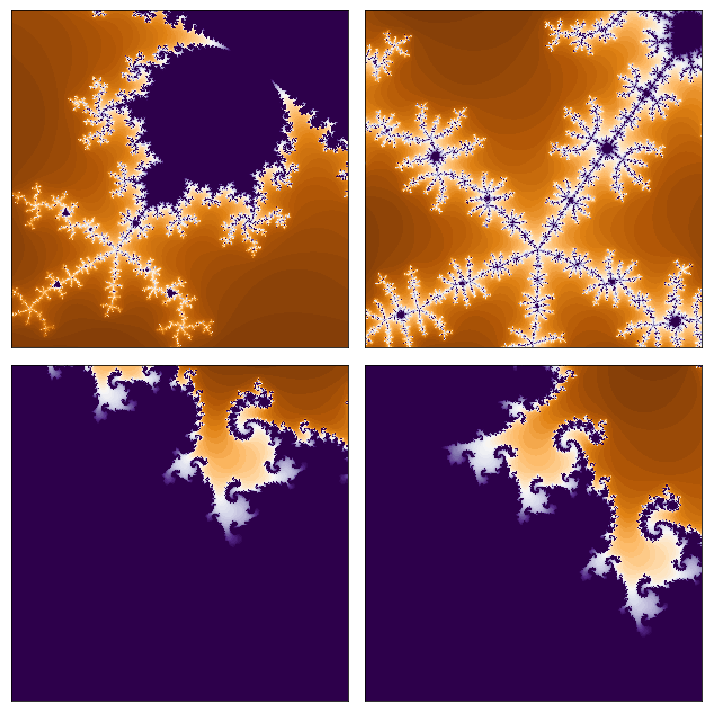

In [56]:
stu_num = 0.1301
dimptsa=300

#plot parameters
maxrunsa=[80, 80, 80, 80]                       #max_runs for each plot
vnorms=[1, 1, 1, 1]                             #vmax for each plot (normalises the color scheme)
xmins=[-0.625, -0.575, -0.839, -0.844]
xmaxs=[-0.425, -0.550, -0.819, -0.822]
ymins=[-0.7, -0.65, 0.172, 0.177]
ymaxs=[-0.5, -0.625, 0.192, 0.199]

fig = plt.figure(figsize=(10,10))

for graph in range(4):
    ax = fig.add_subplot(2, 2, graph+1)
    
    x1=np.linspace(xmins[graph], xmaxs[graph], dimptsa)
    y1=np.linspace(ymins[graph], ymaxs[graph], dimptsa)

    Xn,Yn = np.meshgrid(x1, y1)
    
    M1 = func_vec(Xn, Yn, maxrunsa[graph])
    
    ax.pcolormesh(Xn, Yn, M1, cmap=cm.PuOr, vmax=1.0*M1.max())
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()





In [58]:
fig.savefig('mandelbrot_plot.png', bbox_inches='tight', dpi=200)